In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import numpy as np

#Explore data. Use methods to familiarize yourself with columns and their values
life = pd.read_csv('all_data.csv')
life.rename(columns = {'Life expectancy at birth (years)' : 'life_exp'}, inplace = True)
life.Country.unique()
print(life.head(15))
life.Country.unique()



   Country  Year  life_exp           GDP
0    Chile  2000      77.3  7.786093e+10
1    Chile  2001      77.3  7.097992e+10
2    Chile  2002      77.8  6.973681e+10
3    Chile  2003      77.9  7.564346e+10
4    Chile  2004      78.0  9.921039e+10
5    Chile  2005      78.4  1.229650e+11
6    Chile  2006      78.9  1.547880e+11
7    Chile  2007      78.9  1.736060e+11
8    Chile  2008      79.6  1.796380e+11
9    Chile  2009      79.3  1.723890e+11
10   Chile  2010      79.1  2.185380e+11
11   Chile  2011      79.8  2.522520e+11
12   Chile  2012      79.9  2.671220e+11
13   Chile  2013      80.1  2.783840e+11
14   Chile  2014      80.3  2.609900e+11


array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

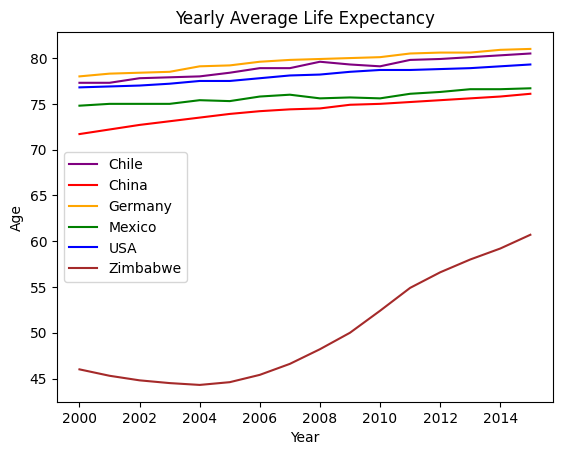

All countries in the dataset have seen a consistent increase in average life expectancy, most notably, Zimbabwe.
Germany has maintained the highest average life expectancy from 200 - 2014.


<Figure size 640x480 with 0 Axes>

In [35]:
#Create single line plot to observe average life expectatncy trends for each country
#Sub dataframe function
def new_df(string): 
    life2 = life[(life.Country == string)]
    return life2

#Establish subdataframes
life_Chile = new_df('Chile')
life_China = new_df('China')
life_Germany = new_df('Germany')
life_Mexico = new_df('Mexico')
life_USA = new_df('United States of America')
life_Zimbabwe = new_df('Zimbabwe')

#Average life_exp by year function 
def life_exp_by_year(x, lst): 
    lst1 = []
    for num in lst: 
        x2 = x[(x.Year == num)]
        lst1.append(x2.life_exp.mean())
    return lst1

#Establish average life_exp by year lists
Chile_by_year = life_exp_by_year(life_Chile, life.Year.unique())
China_by_year = life_exp_by_year(life_China, life.Year.unique())
Germany_by_year = life_exp_by_year(life_Germany, life.Year.unique())
Mexico_by_year = life_exp_by_year(life_Mexico, life.Year.unique())
USA_by_year = life_exp_by_year(life_USA, life.Year.unique())
Zimbabwe_by_year = life_exp_by_year(life_Zimbabwe, life.Year.unique())

#Plot lines
plt.plot(life.Year.unique(), Chile_by_year, color = 'purple', label = 'Chile')
plt.plot(life.Year.unique(), China_by_year, color = 'red', label = 'China')
plt.plot(life.Year.unique(), Germany_by_year, color = 'orange', label ='Germany')
plt.plot(life.Year.unique(), Mexico_by_year, color = 'green', label = 'Mexico')
plt.plot(life.Year.unique(), USA_by_year, color = 'blue', label = 'USA')
plt.plot(life.Year.unique(), Zimbabwe_by_year, color = 'brown', label = 'Zimbabwe')
plt.legend()
plt.title('Yearly Average Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Age')
plt.show()
plt.clf()

print(f'All countries in the dataset have seen a consistent increase in average life expectancy, most notably, Zimbabwe.\nGermany has maintained the highest average life expectancy from 200 - 2014.')

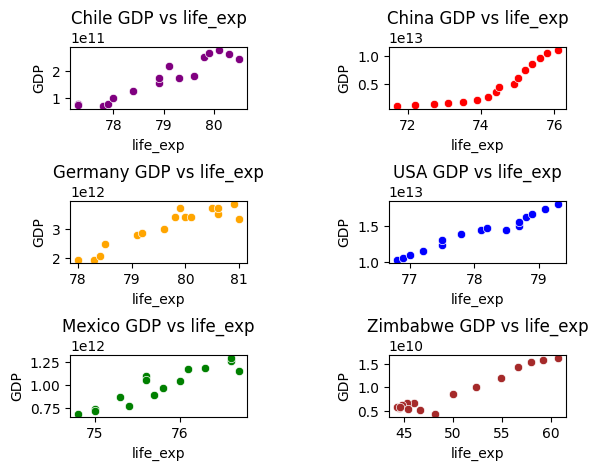

All countires in the data set have a strong positive correlation between GDP and life expectancty


<Figure size 640x480 with 0 Axes>

In [48]:
#Create individual subplots to view relationship between GDP and life_exp fro each country

#Generate subplots
plt.subplot(3,2,1)
plt.title('Chile GDP vs life_exp')
sns.scatterplot(x = life_Chile.life_exp, y = life_Chile.GDP, color = 'purple')
plt.subplot(3,2,2)
plt.title('China GDP vs life_exp')
sns.scatterplot(x = life_China.life_exp, y = life_China.GDP, color = 'red')
plt.subplot(3,2,3)
plt.title('Germany GDP vs life_exp')
sns.scatterplot(x = life_Germany.life_exp, y = life_Germany.GDP, color = 'orange')
plt.subplot(3,2,4)
plt.title('USA GDP vs life_exp')
sns.scatterplot(x = life_USA.life_exp, y = life_USA.GDP, color = 'blue')
plt.subplot(3,2,5)
plt.title('Mexico GDP vs life_exp')
sns.scatterplot(x = life_Mexico.life_exp, y = life_Mexico.GDP, color = 'green')
plt.subplot(3,2,6)
plt.title('Zimbabwe GDP vs life_exp')
sns.scatterplot(x = life_Zimbabwe.life_exp, y = life_Zimbabwe.GDP, color = 'brown')
plt.subplots_adjust(hspace = 1.5, wspace = .8)
plt.show()
plt.clf()

print('All countires in the data set have a strong positive correlation between GDP and life expectancty.')

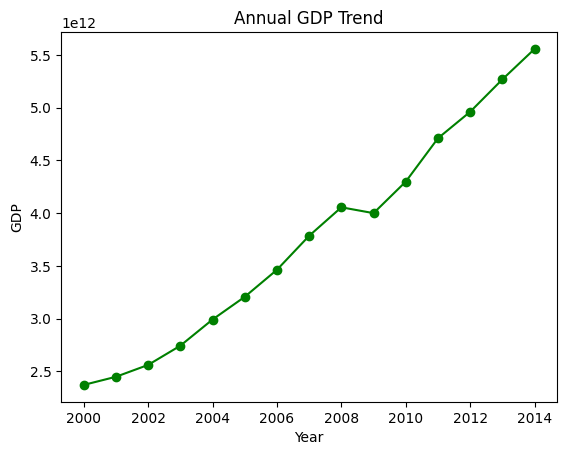

GDP has grown at a steady rate year over year.
The only instance where there was a decrease in GDP was between 2008 ad 2010.


<Figure size 640x480 with 0 Axes>

In [77]:
#Determine the average GDP per year for the entire dataset

#Function to create sub dataframes based on year
def new_df2(num):
    life2 = life[(life.Year == num)]
    return life2

#Establish data frame for each year
year_2000 = new_df2(2000)
year_2001 = new_df2(2001)
year_2002 = new_df2(2002)
year_2003 = new_df2(2003)
year_2004 = new_df2(2004)
year_2005 = new_df2(2005)
year_2006 = new_df2(2006)
year_2007 = new_df2(2007)
year_2008 = new_df2(2008)
year_2009 = new_df2(2009)
year_2010 = new_df2(2010)
year_2011 = new_df2(2011)
year_2012 = new_df2(2012)
year_2013 = new_df2(2013)
year_2014 = new_df2(2014)

#Calculate average GDP for each year
year_df_list = [year_2000, year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014]
#Function that will hold averages for each year
def avg(lst): 
    lst1 = []
    for i in lst: 
       lst1.append(i.GDP.mean())
    return lst1

average_GDPs = avg(year_df_list)

#Generate line plot
plt.title('Annual GDP Trend')
plt.plot(range(2000, 2015), average_GDPs, marker ='o', color = 'green')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()
plt.clf()
print(f'GDP has grown at a steady rate year over year.\nThe only instance where there was a decrease in GDP was between 2008 ad 2010.')

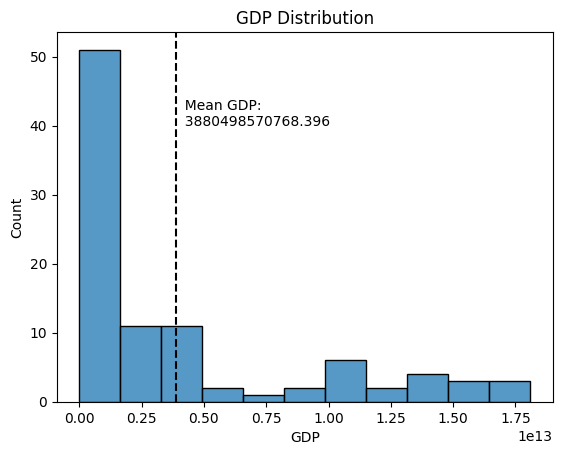

The GDP distribution is right skewed. This is an indicator that the mean overestimates the most common GDP values in the datset.


<Figure size 640x480 with 0 Axes>

In [103]:
#Explore GDP distribution and identify average

#GDP Histogram
plt.title('GDP Distribution')
sns.histplot(life.GDP)
plt.axvline(life.GDP.mean(), color = 'black', linestyle = '--')
plt.text(life.GDP.mean(), 40, f'  Mean GDP:\n  {life.GDP.mean()}')
plt.show()
plt.clf()

print('The GDP distribution is right skewed. This is an indicator that the mean overestimates the most common GDP values in the datset.')